In [15]:
import numpy as np
import pandas as pd

wine_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
# quality 값을 0 또는 1로 변환 (이진화)
# quality가 5보다 크다면 1, 아니면 0
binary_data = wine_red.copy()
binary_data['quality'] = binary_data['quality'].apply(lambda x: 1 if x>5 else 0)
binary_data.quality.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [17]:
# X: fixed acidity부터 alcohol
# y: 이진화한 quality
X = binary_data.iloc[:, :-1]
y = binary_data.iloc[:, -1]

In [18]:
# k-fold 진행. k = 5
from sklearn.model_selection import KFold

# random_state : 일정한 난수로 정해주는 option (정해줘도 되고 안정해줘도됨.)
fold = KFold(n_splits=5, shuffle=True, random_state=1030) 

fold.split(wine_red)

<generator object _BaseKFold.split at 0x7fb4f1a91190>

In [20]:
# 분류 모델은 logistic regression 모델을 사용
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# 각 fold에서 생성된 결과를 저장하기 위해 변수 선언
# []은 list, {}은 dictionary
result=[]
accuracy={}
recall={}
precision={}
f1={}
confusion_mtx={}

# k-fold cross validation 시작
for i, (idx_train, idx_test) in enumerate(fold.split(wine_red)):
    # 나눠진 index를 이용하여 train과 test split
    x_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    x_test, y_test = X.iloc[idx_test], y.iloc[idx_test]

    print("idx_train: ", idx_train)
    print("idx_test: ", idx_test)

    print("x_train: ", x_train)
    print("y_train: ", y_train)

    print()
    print("x_train shape: ", x_train.shape)
    print("y_train shape: ", y_train.shape)
    print()

    # 훈련 데이터로 scaler를 fit 해서 x 데이터를 scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # logistic regression 모델로 훈련
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)

    # 예측 결과와 평가지표 저장
    # list에 원소를 추가할 때는 append() 함수 사용
    # dictionary에 원소를 추가할 때는 dict[key] = value 형식으로 추가
    result.append(y_pred)
    accuracy[f'fold{i}'] = accuracy_score(y_pred, y_test)
    recall[f'fold{i}'] = recall_score(y_pred, y_test)
    precision[f'fold{i}'] = precision_score(y_pred, y_test)
    f1[f'fold{i}'] = f1_score(y_pred, y_test)
    confusion_mtx[f'fold{i}'] = confusion_matrix(y_pred, y_test)

idx_train:  [   0    1    2 ... 1595 1596 1597]
idx_test:  [   5    6   22   33   37   42   43   54   65   66   67   69   77   78
   83   91   98  100  102  103  107  113  114  115  118  121  122  123
  124  135  143  152  153  164  172  175  178  183  186  188  189  190
  198  207  209  220  229  230  236  237  239  240  247  251  256  268
  274  280  287  290  297  301  303  308  311  314  317  319  324  326
  329  342  343  349  350  356  360  362  363  367  370  377  391  392
  394  396  403  407  409  414  446  447  456  466  474  483  486  487
  492  496  497  498  499  512  515  519  521  522  529  538  542  555
  558  559  576  580  588  590  598  601  605  606  608  611  623  624
  627  629  631  633  635  636  640  642  643  654  655  661  667  669
  670  685  687  691  692  699  701  713  720  725  729  731  734  737
  740  747  761  777  783  787  789  790  796  804  805  808  810  821
  823  826  827  844  862  866  868  869  870  873  876  879  882  884
  887  893  898  8

In [6]:
for k, v in accuracy.items():
    print(k, ":", v)

fold0 : 0.7125
fold1 : 0.759375
fold2 : 0.709375
fold3 : 0.759375
fold4 : 0.780564263322884


In [7]:
for k, v in recall.items():
    print(k, ":", v)

fold0 : 0.7044025157232704
fold1 : 0.7745664739884393
fold2 : 0.7469135802469136
fold3 : 0.7823529411764706
fold4 : 0.8055555555555556


In [8]:
for k, v in precision.items():
    print(k, ":", v)

fold0 : 0.7133757961783439
fold1 : 0.7790697674418605
fold2 : 0.6994219653179191
fold3 : 0.7687861271676301
fold4 : 0.8055555555555556


In [9]:
for k, v in f1.items():
    print(k, ":", v)

fold0 : 0.7088607594936708
fold1 : 0.7768115942028986
fold2 : 0.7223880597014924
fold3 : 0.7755102040816327
fold4 : 0.8055555555555556


In [10]:
for k, v in confusion_mtx.items():
    print(k, ":", v)

fold0 : [[116  45]
 [ 47 112]]
fold1 : [[109  38]
 [ 39 134]]
fold2 : [[106  52]
 [ 41 121]]
fold3 : [[110  40]
 [ 37 133]]
fold4 : [[104  35]
 [ 35 145]]


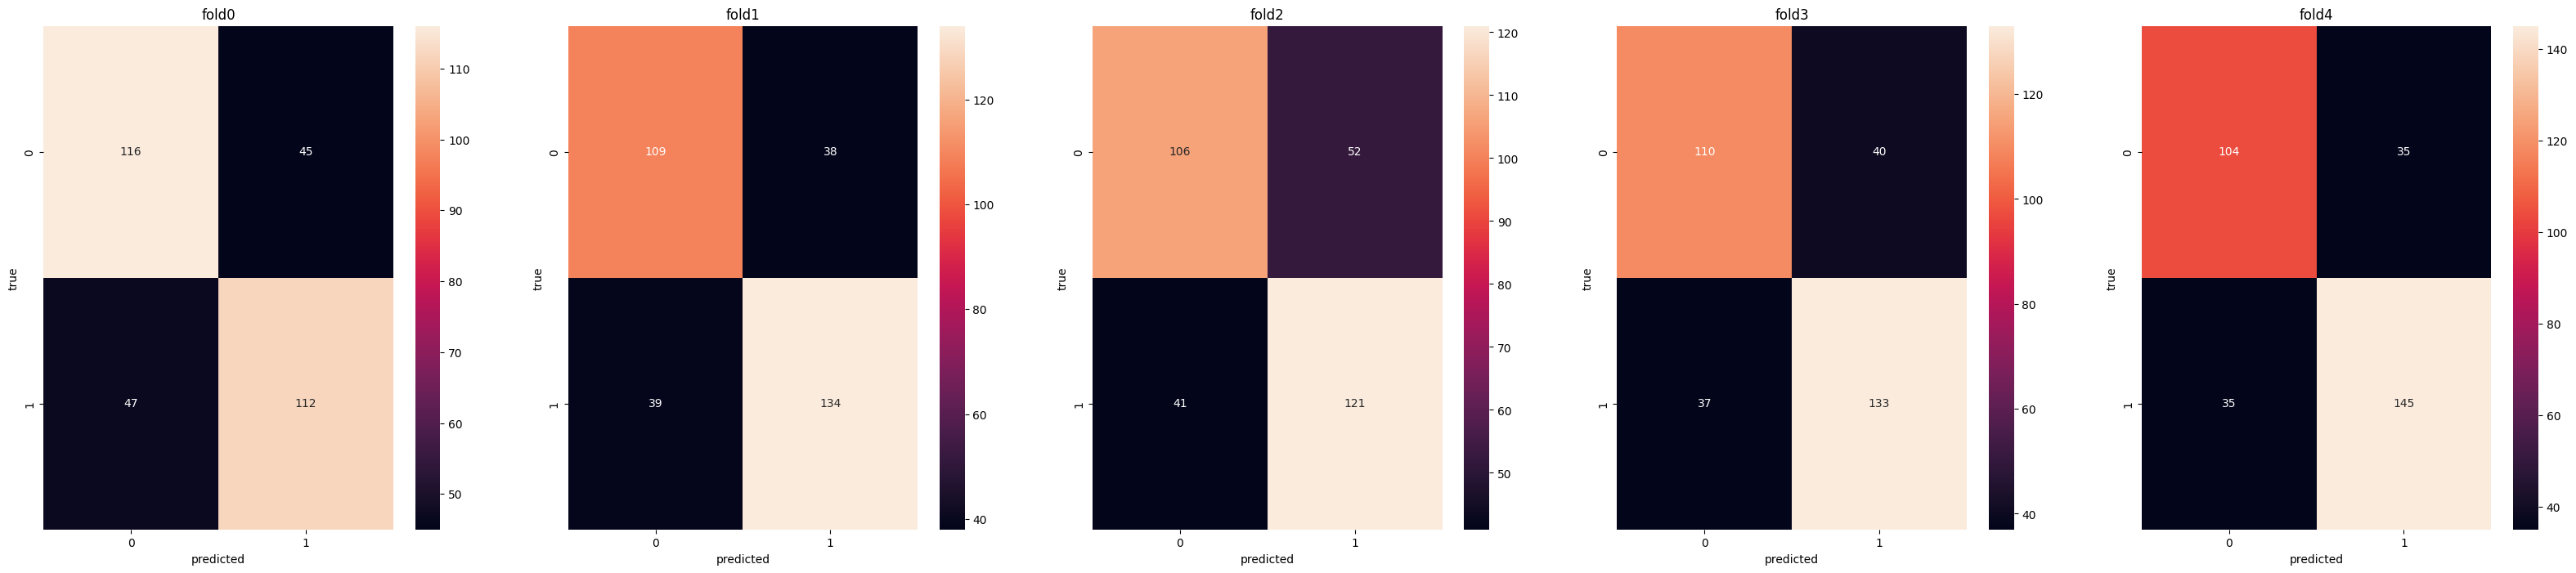

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(1,5, figsize=(40,8))
for i, matrix in enumerate(confusion_mtx.values()):
    sb.heatmap(matrix, annot=True, fmt=".0f", ax=ax[i])
    ax[i].set_xlabel('predicted')
    ax[i].set_ylabel('true')
    ax[i].set_title(f'fold{i}')

# Homework

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

data_digits = load_digits()
X = data_digits.data
y = data_digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


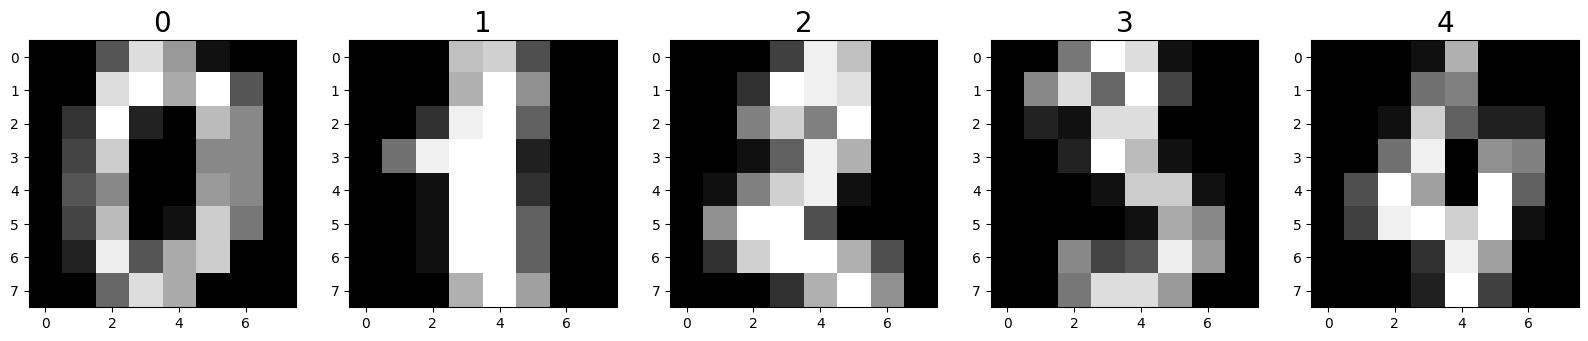

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data_digits.data[0:5], 
                                           data_digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize = 20);

### 여기서부터 과제

### MNIST 데이터셋에 대해서 k-fold cross validation 수행

In [24]:
# k-fold 진행. k 값은 자유롭게 2 <= k <= 10, k = 3
from sklearn.model_selection import KFold

# random_state : 일정한 난수로 정해주는 option (정해줘도 되고 안정해줘도됨.)
fold = KFold(n_splits=3, shuffle=True, random_state=1030) 

In [29]:
data_digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [32]:
# 분류 모델은 logistic regression 모델을 사용
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# 각 fold에서 생성된 결과를 저장하기 위해 변수 선언
result=[]
accuracy={}
recall={}
precision={}
f1={}
confusion_mtx={}

# k-fold cross validation 시작
for i, (idx_train, idx_test) in enumerate(fold.split(data_digits.data)):
    # 나눠진 index를 이용하여 train과 test split
    print("idx_train: ", idx_train)
    print("idx_test: ", idx_test)
    x_train, y_train = X[idx_train], y[idx_train]
    x_test, y_test = X[idx_test], y[idx_test]

    print("x_train: ", x_train)
    print("y_train: ", y_train)

    print()
    print("x_train shape: ", x_train.shape)
    print("y_train shape: ", y_train.shape)
    print()
    
    
    # 훈련 데이터로 scaler를 fit 해서 x 데이터를 scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    
    # logistic regression 모델로 훈련
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    
    
    # 예측 결과와 평가지표 저장
    result.append(y_pred)
    accuracy[f'fold{i}'] = accuracy_score(y_pred, y_test)
    recall[f'fold{i}'] = recall_score(y_pred, y_test, average='micro')
    precision[f'fold{i}'] = precision_score(y_pred, y_test, average='micro')
    f1[f'fold{i}'] = f1_score(y_pred, y_test, average='micro')
    confusion_mtx[f'fold{i}'] = confusion_matrix(y_pred, y_test)

idx_train:  [   1    2    3 ... 1791 1792 1795]
idx_test:  [   0    4    5    6   22   23   24   28   33   36   37   42   43   45
   48   54   58   65   66   67   69   74   75   77   78   80   83   84
   85   90   91   94   95   98   99  100  102  103  107  113  114  115
  118  121  122  123  124  125  128  129  130  135  137  138  143  152
  153  157  164  166  167  168  172  173  174  175  176  178  183  184
  186  188  189  190  193  198  204  207  209  215  220  222  229  230
  236  237  238  239  240  243  246  247  249  251  252  256  264  268
  270  272  274  276  280  282  287  289  290  297  299  301  303  305
  308  310  311  314  316  317  319  324  326  329  336  342  343  346
  349  350  352  356  359  360  362  363  367  368  369  370  373  374
  377  382  386  391  392  394  396  403  407  409  412  414  424  428
  437  438  443  445  446  447  456  457  458  464  466  474  477  482
  483  486  487  488  490  492  496  497  498  499  508  509  512  515
  517  518  519  5

In [33]:
# accuracy, recall, precision, f1 score, confusion matrix 출력
# 'average' option 필요 시 'micro' 사용
for k, v in accuracy.items():
    print("[accuracy]", k, ":", v)
print()

for k, v in recall.items():
    print("[recall]", k, ":", v)
print()

for k, v in precision.items():
    print("[precision]", k, ":", v)
print()

for k, v in f1.items():
    print("[f1_score]", k, ":", v)
print()

for k, v in confusion_mtx.items():
    print("confusion_matrix]", k, ":", v)

[accuracy] fold0 : 0.9549248747913188
[accuracy] fold1 : 0.9666110183639399
[accuracy] fold2 : 0.9632721202003339

[recall] fold0 : 0.9549248747913188
[recall] fold1 : 0.9666110183639399
[recall] fold2 : 0.9632721202003339

[precision] fold0 : 0.9549248747913188
[precision] fold1 : 0.9666110183639399
[precision] fold2 : 0.9632721202003339

[f1_score] fold0 : 0.9549248747913188
[f1_score] fold1 : 0.96661101836394
[f1_score] fold2 : 0.9632721202003339

confusion_matrix] fold0 : [[52  0  0  0  0  0  0  0  0  0]
 [ 0 61  1  0  1  0  2  0  4  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  1  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  1  0]
 [ 0  0  0  0  0 47  1  0  0  2]
 [ 0  0  0  0  0  0 68  0  0  0]
 [ 0  0  2  0  0  0  0 62  1  0]
 [ 0  1  1  1  1  0  1  0 52  3]
 [ 0  0  0  1  0  2  0  0  0 46]]
confusion_matrix] fold1 : [[63  0  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  1  0  0  0  2  1]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  1 64  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  1  0  

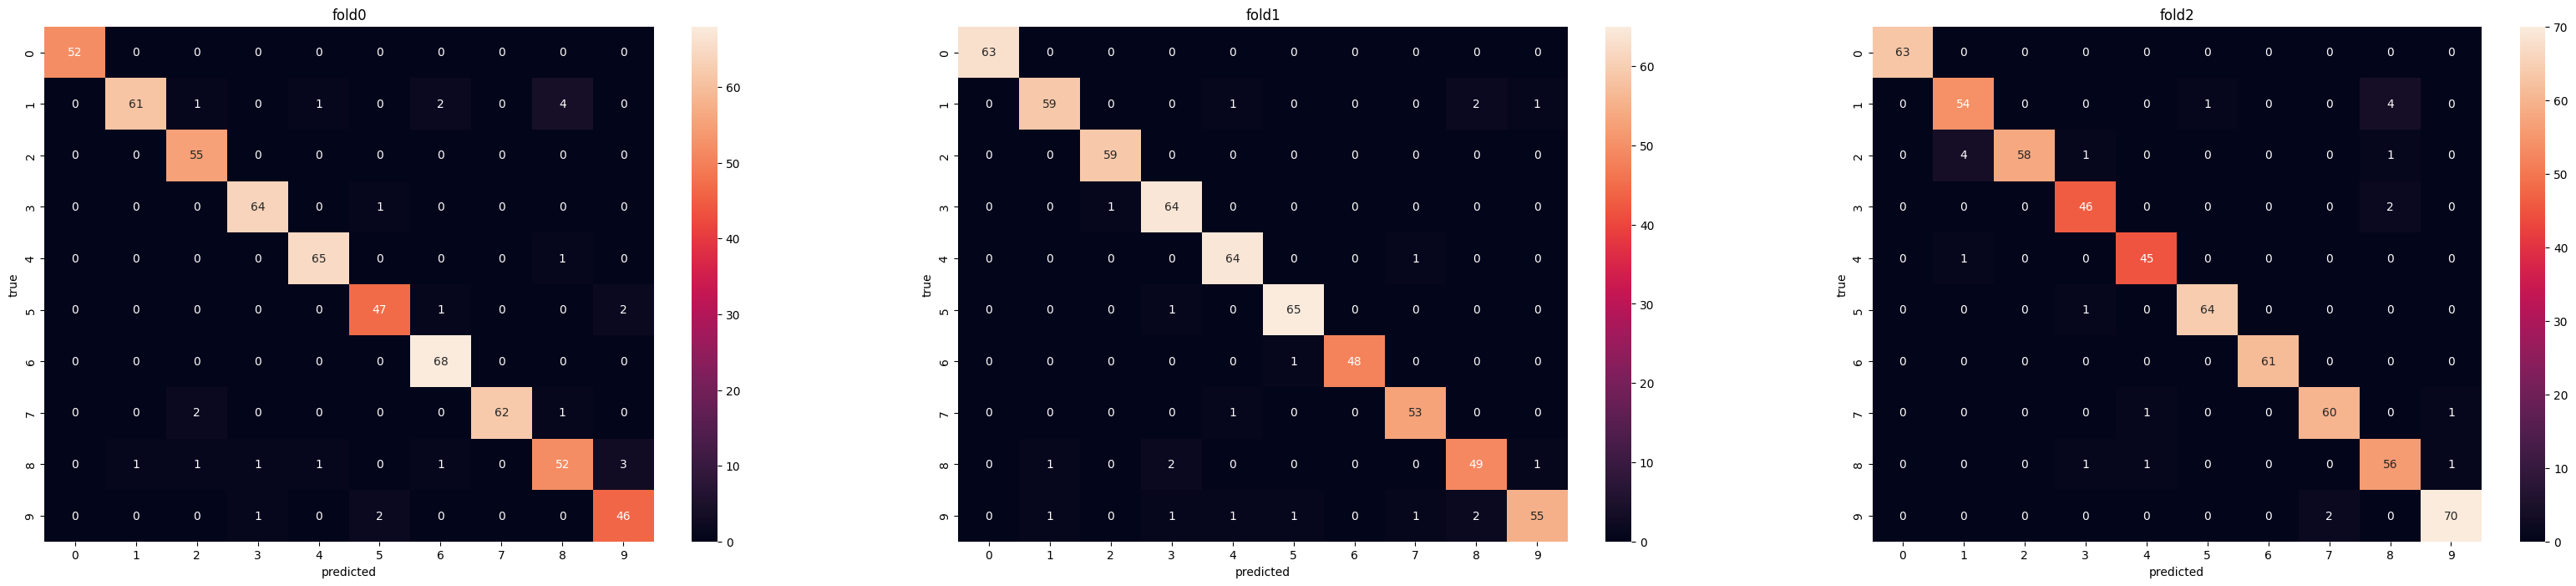

In [34]:
# 각 fold마다 confusion matrix 시각화
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(1,3, figsize=(40,8))
for i, matrix in enumerate(confusion_mtx.values()):
    sb.heatmap(matrix, annot=True, fmt=".0f", ax=ax[i])
    ax[i].set_xlabel('predicted')
    ax[i].set_ylabel('true')
    ax[i].set_title(f'fold{i}')